In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import skew 
from scipy.stats import kurtosis
from scipy.stats import jarque_bera
import numpy as np

- pandas: Used for data manipulation and analysis.
- matplotlib.pyplot: Used for creating plots and graphs.
- statsmodels.graphics.tsaplots: Provides functions for plotting autocorrelation and partial autocorrelation functions.
- statsmodels.tsa.stattools: Contains the Augmented Dickey-Fuller test function for stationarity testing.
- numpy: Used for mathematical operations.

In [3]:
# Read the Excel file into a DataFrame

data = pd.read_csv('D:\\Ciclo X\\Series de tiempo\\Mensuales-20240324-161013.csv', index_col=0)


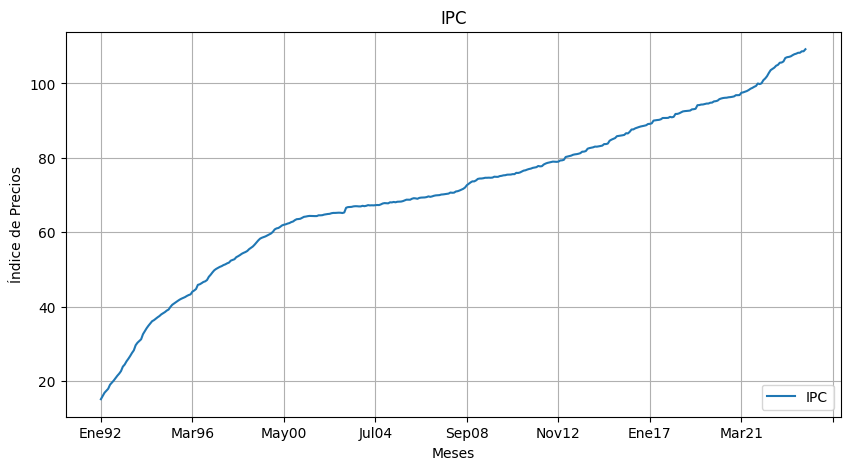

In [4]:
# Plot the GDP data
data.plot(figsize=(10, 5), grid=True)
plt.title("IPC")
plt.xlabel("Meses")
plt.ylabel("Índice de Precios")
plt.legend(loc='lower right')
plt.show()

# Construir los retornos de la serie

In [5]:
## TRansformacion logaritmica 

data['IPC_logs'] = np.log(data['IPC'])
# Calculate first differences
data["IPC_diff"] = data['IPC_logs'].diff()

# Convert to growth rates (multiply by 100)
data['IPC_growth'] = data['IPC_diff'] * 100


# Display the transformed dataset
data



,IPC,IPC_logs,IPC_diff,IPC_growth
DATE,,,,
Ene92,15.123827,2.716271,NaN,NaN
Feb92,16.021901,2.773957,0.057685,5.768518
Mar92,16.875603,2.825869,0.051912,5.191235
Abr92,17.417941,2.857501,0.031632,3.163178
May92,17.936256,2.886824,0.029323,2.932341
...,...,...,...,...
Oct23,108.257134,4.684509,0.002194,0.219383
Nov23,108.260801,4.684543,0.000034,0.003387
Dic23,108.648210,4.688115,0.003572,0.357209


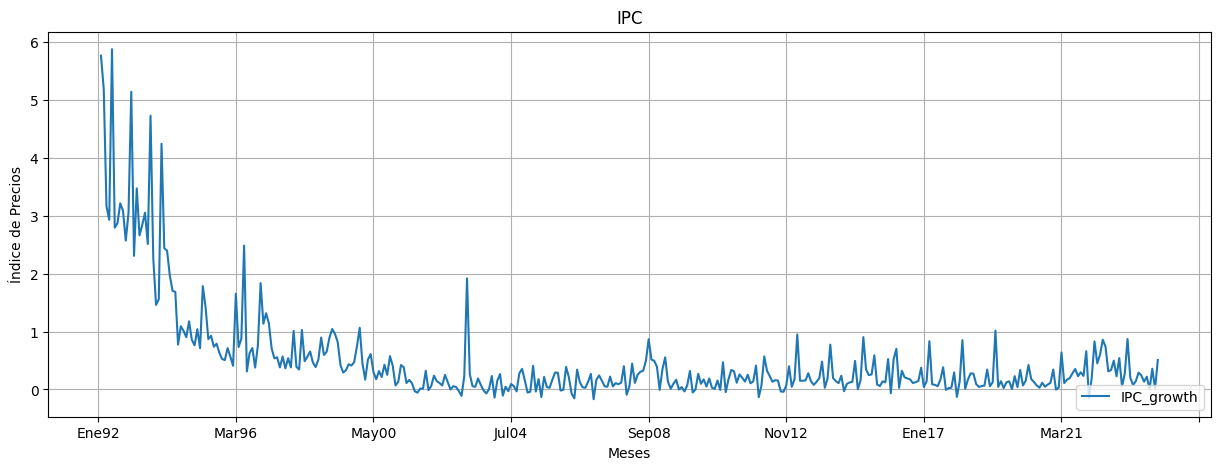

In [6]:
# Plot the GDP data
data.IPC_growth.plot(figsize=(15, 5), grid=True)

plt.title("IPC")
plt.xlabel("Meses")
plt.ylabel("Índice de Precios")
plt.legend(loc='lower right')
plt.show()

# Estacionariedad

One way to check for stationarity is by analyzing the autocorrelation function (ACF) of the time series data. ACF measures the correlation between a data point and its lagged values. In a stationary series, the ACF values should decay quickly, indicating that there is little correlation between observations at different time lags.

In this example, we are plotting the ACF for the GDP data up to 20 lags. If the ACF values drop off quickly, it suggests that the series might be stationary.

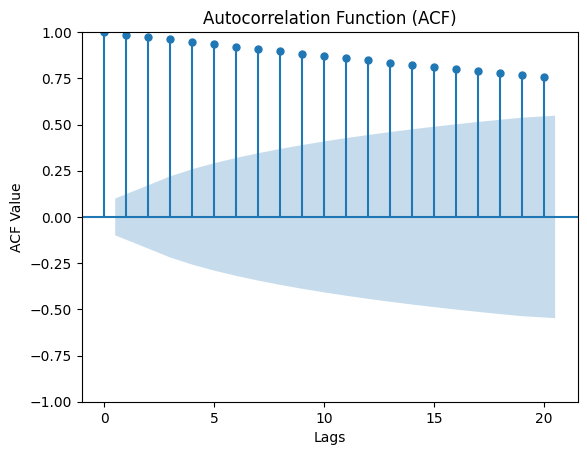

In [7]:
plot_acf(data['IPC'], lags=20)
#data.GDPC1
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.show()

# Augmented Dickey-Fuller Test for Stationarity
The Augmented Dickey-Fuller (ADF) test is a statistical test commonly used to check for stationarity in a time series. It tests the null hypothesis that a unit root is present in the series, which indicates non-stationarity. If the p-value obtained from the test is less than a certain threshold (e.g., 0.05), we can reject the null hypothesis and conclude that the series is stationary.

In [8]:
adftest = adfuller(data['IPC'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -2.917280167386508
P-Value: 0.15669371461160664
Number of lags: 13
Number of observations: 372
Critical Values: {'1%': -3.9833143247176004, '5%': -3.4223583285142665, '10%': -3.134029335481633}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


# Making the Series Stationary


Importance of Stationarity
Stationarity is a critical concept in time series analysis. A stationary time series is one in which statistical properties, such as mean and variance, remain constant over time. Working with stationary series is essential for several reasons when analyzing time series data:

Easier Modeling: Stationary series are more straightforward to model and forecast. Many time series models assume stationarity as an underlying assumption.
Meaningful Interpretation: Stationary data enables a more meaningful interpretation of trends, patterns, and relationships within the data.
Statistical Tests: Many statistical tests and techniques rely on the assumption of stationarity. For example, tests for autocorrelation and cointegration assume stationarity.

# Trend in Economic Series and Detrending

Most economic time series exhibit trends over time, often influenced by factors like economic growth, inflation, or demographic changes. However, to apply various time series techniques effectively, it’s important to remove the trend and make the series stationary. Detrending involves eliminating the trend component to focus on the underlying variations.

Detrending can be achieved through techniques such as:

Differencing: By calculating the difference between consecutive observations, a linear trend can be removed.
Decomposition: This technique involves breaking down the time series into components such as trend, seasonal, and residual to analyze them separately.
Regression: Modeling the trend through regression and then examining the residuals.

# Logarithms and First Differences


Applying logarithms and computing first differences are common techniques for achieving stationarity and calculating growth rates of variables, including GDP growth:

Logarithms: Logarithms are particularly effective when dealing with variables that exhibit exponential growth or fluctuation-prone patterns. Applying logarithmic transformation stabilizes the variance, making the data more suitable for analysis methods assuming constant variance. For economic indicators like GDP, which often experience significant variations, applying logarithms can stabilize the data and improve the accuracy of subsequent analyses.
First Differences: Calculating the first differences, which involves subtracting each observation from its previous one, removes linear trends from the data. This transformation changes the data’s structure, creating a sequence where the differences between adjacent observations indicate changes within the series. When applied to GDP data, it quantifies the economy’s growth rates over time, providing insights into economic trends and fluctuations.
Additionally, multiplying the resulting series by 100 converts the growth rates into percentage terms, facilitating more intuitive interpretation. For example, if the transformed series value is 0.05, it corresponds to a growth rate of 5%.

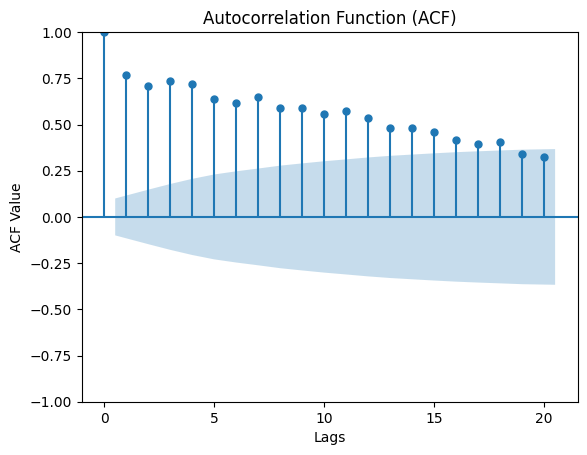

In [9]:
plot_acf(data['IPC_growth'].dropna(), lags=20)
#data.GDPC1
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.show()




In [10]:
# Let’s test the stationarity with the Augmented Dickey Fuller Test
adftest = adfuller(data['IPC_growth'].dropna(), autolag = 'AIC', regression = 'ct')
print("ADF Test Results")
print("Null Hypothesis: The series has an Unit Root")
print("ADF-Statistic:", adftest[0])
print("P-Value:",round(adftest[1], 3))
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary")

ADF Test Results
Null Hypothesis: The series has an Unit Root
ADF-Statistic: -4.717968482107761
P-Value: 0.001
Number of lags: 15
Number of observations: 369
Critical Values {'1%': -3.983515598693353, '5%': -3.422455368679502, '10%': -3.1340863176710405}
Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary


### Momentos estadísticos 

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.
kurtosis for normal distribution is equal to 3.
For a distribution having kurtosis < 3: It is called playkurtic.
For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution

In [11]:

media = np.mean(data['IPC_growth'].dropna())
varianza = np.var(data['IPC_growth'].dropna())
sesgo = skew(data['IPC_growth'].dropna(), axis=0, bias=True)
curtosis = kurtosis(data['IPC_growth'].dropna(), axis=0, bias=True)
print(f"Sesgo: {sesgo}, Kurtosis: {curtosis}, Media: {media}, Varianza: {varianza}")

Sesgo: 3.4163528077977796, Kurtosis: 13.664800521943814, Media: 0.5135132141435613, Varianza: 0.7511763034091506


In [12]:
import numpy as np
from scipy.stats import skew, kurtosis

# Calcula la media y la varianza de la serie temporal 'IPC_growth'
media = np.mean(data['IPC_growth'].dropna())
varianza = np.var(data['IPC_growth'].dropna())

# Calcula el sesgo y la curtosis de la serie temporal 'IPC_growth'
sesgo = skew(data['IPC_growth'].dropna(), axis=0, bias=True)
curtosis = kurtosis(data['IPC_growth'].dropna(), axis=0, bias=True)

# Imprime los resultados con redondeo a tres dígitos
print("Estadísticas de la serie temporal 'IPC_growth':")
print(f"Sesgo: {round(sesgo, 3)}, Kurtosis: {round(curtosis, 3)}, Media: {round(media, 3)}, Varianza: {round(varianza, 3)}")


Estadísticas de la serie temporal 'IPC_growth':
Sesgo: 3.416, Kurtosis: 13.665, Media: 0.514, Varianza: 0.751


In [14]:
max_ipc = np.max(data['IPC_growth'])
min_ipc = np.min(data['IPC_growth'])
#print(f"Mínimo: {min_ipc}, Máximo: {max_ipc}")
print(f"Mínimo: {round(min_ipc, 3)}, Máximo: {round(max_ipc, 3)}")

Mínimo: -0.17, Máximo: 5.881


In [15]:
contador_sobrepasos = 0
min=-5
max=5
# Iterar sobre la serie temporal
for valor in data['IPC_growth'].dropna():
    if valor < min or valor > max:
        contador_sobrepasos += 1


# Imprimir el resultado
print(f"IPC_growth sobrepasa los límites {contador_sobrepasos} veces.")

IPC_growth sobrepasa los límites 4 veces.


In [16]:
porcentaje=contador_sobrepasos/len(data['IPC_growth'])*100
print(f"IPC_growth sobrepasa los límites en un {porcentaje}%.")
print(f"IPC_growth sobrepasa los límites en un {round(porcentaje, 3)}%.")


IPC_growth sobrepasa los límites en un 1.0362694300518136%.
IPC_growth sobrepasa los límites en un 1.036%.


Having your data follow a normal distribution is great since it would allow you to take advantage of all the benefits a normal distribution provides. But how do we know our data is following a normal distribution? That is where the Jarque-Bera Test comes in. In this article, we will learn about the Jarque-Bera Test, how we can apply it to our data in Python with Scipy, some quick practice, and create the test statistic equation from scratch.

# What is the Jarque-Bera Test?

The Jarque-Bera Test is a test to determine if a set of data values follows the normal distribution based on the data’s skewness and kurtosis. The test statistic equation incorporating skewness and kurtosis is:

jb = n/6 (s^2 + 1/4 (K-3)^2)
The test statistic result will always be greater than or equal to zero since:

The sample skewness in the test statistic equation is always squared, meaning S² is always positive or zero.
The sample kurtosis is always positive or zero since the numerator is raised to the 4th power and the denominator is squared.
The difference between the sample kurtosis and 3 is squared, meaning this term of the test statistic equation is always positive or zero.
The sum of two terms ≥ 0 will also be greater than or equal to zero.

We know if our data follows a normal distribution if the test statistic is close to zero and the p-value is larger than our standard 0.05. The p-value relates to a null hypothesis that the data is following a mnormal distribution. If the test statistic is large and the p-value is less than 0.05, the data does not follow a normal distribution

In [61]:
jarque_bera(data['IPC_growth'].dropna())

SignificanceResult(statistic=3744.3277559814255, pvalue=0.0)

The value on the left is the test statistic from our JB equation at the beginning of the article. The value on the right is the p-value from our null hypothesis that the data is following a normal distribution. It is calculated from the difference of 1 and the CDF of the chi-squared distribution with two degrees of freedom applied to the test statistic. CDF again stands for cumulative distribution function, the one used to determine the probability of a range of possibilities in a distribution.

Since the test statistic is incredibly large and the p-value is less than 0.05, we reject the null hypothesis that the Counts data comes from a normal distribution.

In [62]:
from statistics import stdev

In [74]:
vol_anualisada=np.sqrt(12)*stdev(data['IPC_growth'].dropna())
print(vol_anualisada)

3.006258455354653


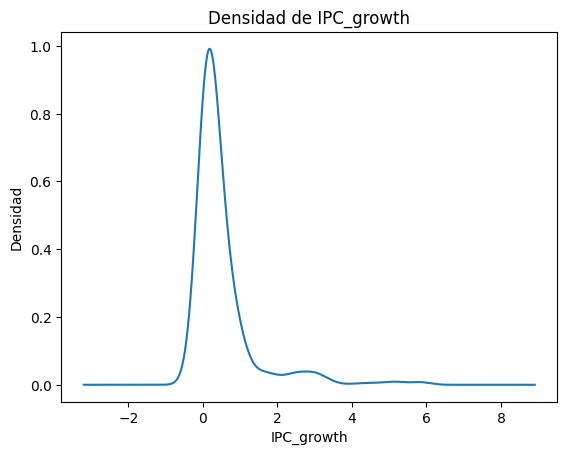

In [63]:
import matplotlib.pyplot as plt

# Graficar la densidad de IPC_growth
data['IPC_growth'].plot.density()

# Agregar etiquetas y título al gráfico
plt.xlabel('IPC_growth')
plt.ylabel('Densidad')
plt.title('Densidad de IPC_growth')

# Mostrar el gráfico
plt.show()


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Suponiendo que 'serie_temporal' es la serie temporal de interés

# Calcula la función de autocorrelación muestral (ACF)

acf_values = acf(data['IPC_growth'].dropna(), nlags=126)

# Graficar la función de autocorrelación
#print(acf_values)
# Rezago deseado

print("Autocorrelación para el rezago 1:", acf_values[1])
print("Autocorrelación para el rezago 5:", acf_values[5])
print("Autocorrelación para el rezago 9:", acf_values[9])
print("Autocorrelación para el rezago 13:", acf_values[13])
print("Autocorrelación para el rezago 17:", acf_values[17])


Autocorrelación para el rezago 1: 0.7669415583563567
Autocorrelación para el rezago 5: 0.6391520584410064
Autocorrelación para el rezago 9: 0.5879011177982286
Autocorrelación para el rezago 13: 0.48046761683761574
Autocorrelación para el rezago 17: -0.06616325663308487


In [95]:
'''import statsmodels.api as sm
Valores=sm.tsa.acf(data['IPC_growth'].dropna(),nlags=126)
print("Autocorrelación para el rezago 1:", Valores[1])
print("Autocorrelación para el rezago 5:", Valores[5])
print("Autocorrelación para el rezago 9:", Valores[9])
print("Autocorrelación para el rezago 13:", Valores[13])
print("Autocorrelación para el rezago 17:", Valores[17])'''

Autocorrelación para el rezago 1: 0.7669415583563567
Autocorrelación para el rezago 5: 0.6391520584410064
Autocorrelación para el rezago 9: 0.5879011177982286
Autocorrelación para el rezago 13: 0.48046761683761574
Autocorrelación para el rezago 17: -0.06616325663308487


In [107]:

# Calcular el límite superior e inferior de las bandas de confianza
n = len(data['IPC_growth'])  # Número de observaciones
banda_confianza = 1.96061681752547*1/ np.sqrt(n-1)  # Para un nivel de confianza del 95%
upper_bound = banda_confianza
lower_bound = -banda_confianza

# Contar cuántos valores de autocorrelación están fuera de las bandas de confianza
Fuera_de_bandas = sum((acf_values[1:] > upper_bound) | (acf_values[1:] < lower_bound))


print("Número de valores de autocorrelación fuera de las bandas de confianza:", Fuera_de_bandas)
print((banda_confianza))


Número de valores de autocorrelación fuera de las bandas de confianza: 61
0.09992228545372314


In [64]:
'''contador_sobrepasos = 0

# Iterar sobre la serie temporal
for valor in acf_values[1:]:
    if valor < lower_bound or valor > upper_bound:
        contador_sobrepasos += 1


# Imprimir el resultado
print(f"IPC_growth sobrepasa los límites {contador_sobrepasos} veces.")

IPC_growth sobrepasa los límites 25 veces.


In [103]:
Mayor_5= sum((abs(acf_values[1:]) > 0.05))

print("Número de valores de autocorrelación mayores a 0.05 en términos absolutos", Mayor_5)


Número de valores de autocorrelación mayores a 0.05 en términos absolutos 97
